In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn.cluster
import sklearn.metrics
import matplotlib.pyplot as plt

In [3]:
color_hist = pd.read_pickle('/data/neon/customer_images/getty/camera_raws/2014 SBXLVII/colorname_originals.pkl')

In [6]:
color_hist.shape

(11, 23410)

Find clusters of image by the color histograms

In [8]:
# Jensen-Shannon divergence
# https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
from scipy.stats import entropy
from numpy.linalg import norm
def JSD(P, Q):
    epsilon = 2e-10
    P = np.array(P, dtype=float)
    Q = np.array(Q, dtype=float)
    new_P = P[P + Q > 0]
    new_Q = Q[P + Q > 0]
    if len(new_P) == 0 or len(new_Q) == 0:
        return 0
    new_P += epsilon
    new_Q += epsilon
    _P = new_P / norm(new_P, ord=1)
    _Q = new_Q / norm(new_Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_color = pca.fit_transform(color_hist.T)

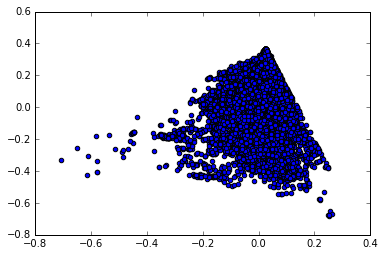

In [54]:
plt.scatter(pca_color[:,3], pca_color[:,1])
dists = [JSD(color_hist.ix[:,0], color_hist.ix[:,x]) for x in range(1,1000)]

-0.0

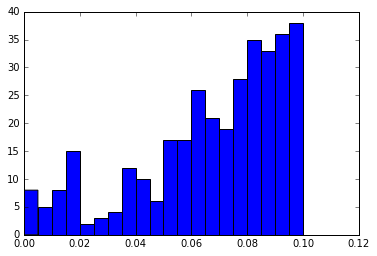

In [62]:
plt.hist(dists, 20, (0.0, 0.1))
min(dists)

In [ ]:
cluster_alg = sklearn.cluster.DBSCAN(eps=0.005, min_samples=3, metric=JSD)
groups = cluster_alg.fit_predict(color_hist.T)

In [17]:
data = pd.read_pickle('/data/neon/customer_images/getty/camera_raws/2014 SBXLVII/score_choices.pkl')

In [ ]:
data['groups'] = groups
data.groupby('groups').rank(ascending=False)

In [9]:
precision, recall, thresh = sklearn.metrics.precision_recall_curve(score['chosen'], scores['score'], 1)

(0.0, 0.1)

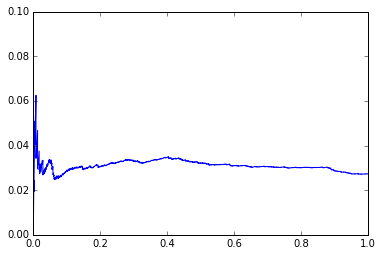

In [11]:
plt.plot(recall, precision)
plt.ylim([0.0, 0.1])